In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Scripts import project_functions as pf

In [2]:
df = pf.load_and_process('../../data/raw/games-features.csv')

# Dataset Explaination
Our dataset features data from the Steam games store. It showcases the games that are purchasable from the store and displays their release date, rating, number of recommendations, owners, genre, pricing, and total revenue. The ratings are pulled from metacritic and recommendations obtained via the steam user base in which they provide their feedback on the games they have purchased from the store. The "GenreIs" columns are true if the game in that row has that genre as a label on Steam. The Rating column values are between 0 and 100, with 0 being bad and 100 being good. The RevenueMillions column is one that we created by multiplying the amount of owners by the current price of the game, however, it is just an estimate of total revenue as it does not account for times the games were purchased at higher or lower prices than currently listed. The PriceInitial and PriceFinal columns show the prices of the games at different points in time.

In [3]:
df.head()

,Games,ReleaseDate,Rating,Recommendations,Owners,CategoryInAppPurchase,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,...,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,RevenueMillions
0,Counter-Strike,Nov 1 2000,88,68991,13033334,False,False,True,False,False,...,False,False,False,False,False,False,False,9.99,9.99,130.203007
1,Team Fortress Classic,Apr 1 1999,0,2439,5399140,False,False,True,False,False,...,False,False,False,False,False,False,False,4.99,4.99,26.941709
2,Day of Defeat,May 1 2003,79,2319,7621102,False,False,True,False,False,...,False,False,False,False,False,False,False,4.99,4.99,38.029299
3,Deathmatch Classic,Jun 1 2001,0,888,7498965,False,False,True,False,False,...,False,False,False,False,False,False,False,4.99,4.99,37.419835
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,5399499,False,False,True,False,False,...,False,False,False,False,False,False,False,4.99,4.99,26.943500


# Task 5

## Research Questions
After looking through and exploring our data, these are the research questions we thought would be interesting to analyse:
1. What game genres are the most popular (they have the most owners)?
2. What game genres make the most money?
3. Does the amount of games in a genre correlate to the genres popularity?
4. Is there a correlation between owners and rating?
5. How do game ratings compare across genres?

#### Owners vs Genre
This plot addresses the question of what genre has the most owners, the Y axis represents the number of owners in billions, and the X axis has each genre labelled. Games can have more than one genre, so the total amount of games is less than the sum of all genres. i.e. if a person owned a game that was both action and adventure, the action, adventure, and total bars would all increase by 1.

Total Owners :  2217998757  Indie :  731152113  Action  :  1512554753  Casual  :  240120444  Adventure  :  550881684  Strategy:  477453337 RPG  :  459321917  Simulation  :  273863846  Early Access :  162389801  Free To Play :  574553200  Sports :  59135546  Racing :  50611953  Massively Multiplayer :   229371663


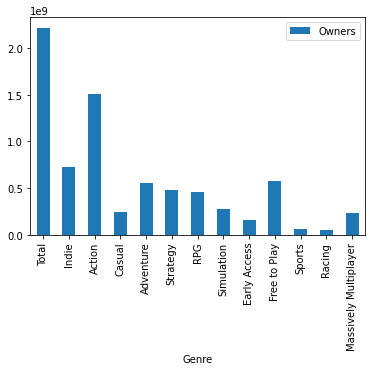

In [4]:
pf.plotOwners(df)

#### Number of Games vs Genre
This plot analyses the total amount of games categorized in each genre. Similar to the owners plot, games can be categorized as more than one genre so the total is less than the sum of all genres. The Y axis represents the total amount of games that exist on Steam, while the X axis categorized them by genre.

Total Games :  13038  Indie Games :  7780  Action Games :  5633  Casual Games :  3564  Adventure Games :  4319  Strategy Games:  2623 RPG  :  2087  Simulation Games :  2102  Early Access :  1438  Free To Play :  665  Sports :  541  Racing :  476  Massively Multiplayer :   389


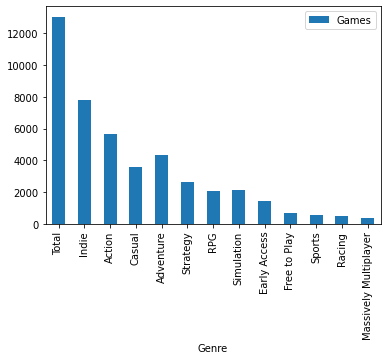

In [5]:
pf.Genrecount(df)

#### Estimated Revenue vs Genre
This plot compares the total theoretical revenue in millions of dollars by genre. The Y axis represents revenue in millions, and the Y axis categorized the bars by genre. Since there were no statistics on the total revenue for each game, we calculated theoretical revenue by multiplying the price of the game by the number of owners it has. This method is not perfect, as it does not account for games purchased when they were on sale or at a higher price than they are now, but it gives us a rough idea of which genre has made the most money over the years.

Total  :  25094.869310830007  Indie  :  6353.22448572  Action  :  16578.13137856  Casual  :  1090.51912292  Adventure :  6796.093231229999  Strategy :  5110.410997350001 RPG  :  5068.28928216  Simulation  :  3228.5843055900004  Early Access :  1089.50451871  Free To Play :  1.2510462500000001  Sports :  736.49216724  Racing :  771.73085653  Massively Multiplayer :   630.50235201


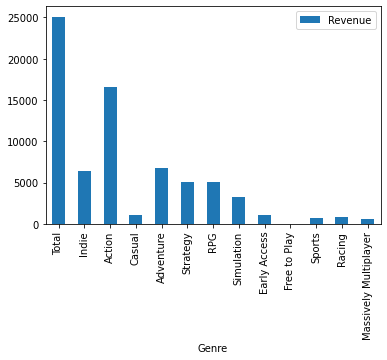

In [6]:
pf.plotRevenue(df)

#### Rating histograms by Genre
These histograms display the average ratings of games depending on their genre. Not every game has a rating on Metacritic, which is the website that the ratings were pulled from, so the total amount of games on these per genre is less than the total amount of games in the other graphs. The Y axis represents the total number of games that have a given rating, with the ratings being defined on the Y axis. Ratings can range from 0-100, with 0 being a very bad game and 100 being a perfect game. Most of the graphs follow a normal distribution, with the mean being somewhere between 65-80 depending on the genre.

<seaborn.axisgrid.FacetGrid object at 0x000001E42E26C550> <seaborn.axisgrid.FacetGrid object at 0x000001E4314E7A60> <seaborn.axisgrid.FacetGrid object at 0x000001E42CB8D3A0> <seaborn.axisgrid.FacetGrid object at 0x000001E42C6CE970> <seaborn.axisgrid.FacetGrid object at 0x000001E42C64C310> <seaborn.axisgrid.FacetGrid object at 0x000001E42C6CEA30> <seaborn.axisgrid.FacetGrid object at 0x000001E42C7B3D60>


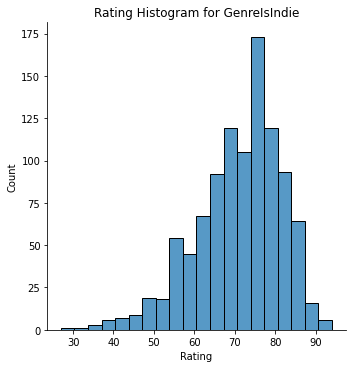

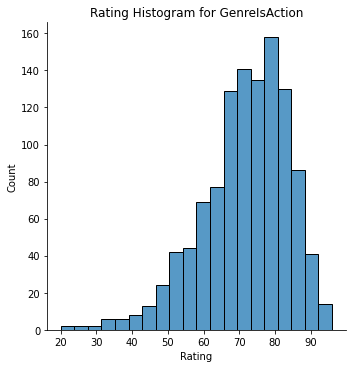

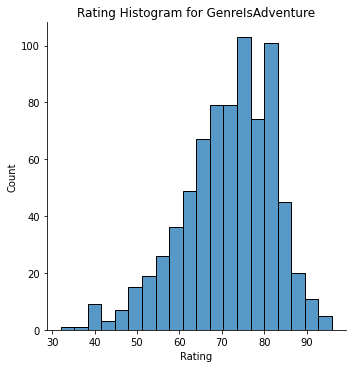

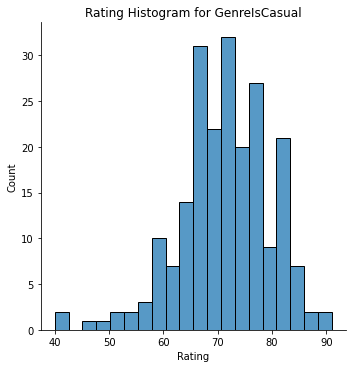

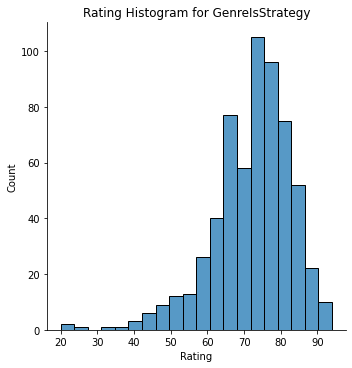

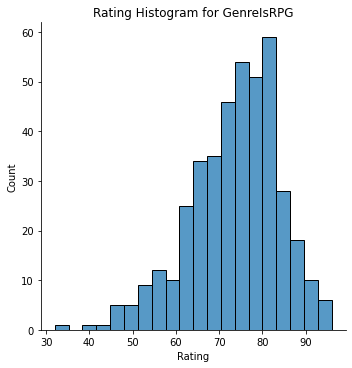

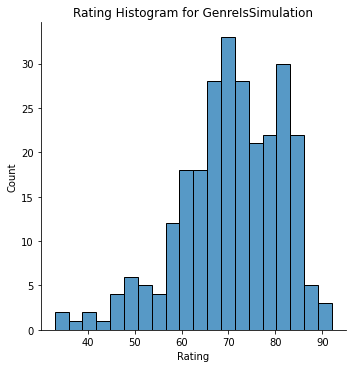

In [7]:
indie = pf.genreratingplot(df,"GenreIsIndie")
action = pf.genreratingplot(df,"GenreIsAction")
adventure = pf.genreratingplot(df,"GenreIsAdventure")
casual = pf.genreratingplot(df,"GenreIsCasual")
strategy = pf.genreratingplot(df,"GenreIsStrategy")
rpg = pf.genreratingplot(df,"GenreIsRPG")
simulation = pf.genreratingplot(df,"GenreIsSimulation")
print(indie,action,adventure,casual,strategy,rpg,simulation)

#### Rating vs Owners
This plot compares the ratings that games receive to the number of owners that they have. The Y axis represents the number of owners in tens of millions, and the X axis represents the Metacritic rating of the games. Again, since not all games have ratings this plot does not include all Steam games, just those with ratings. Some outliers have been removed to make the chart easier to read, as there were a few games with significantly higher owner counts (namely Counter strike and Dota 2) that made the rest of the plot so small that it was hard to understand. The trend line shows that there is a slight upward correlation between a games rating and the number of owners it has.

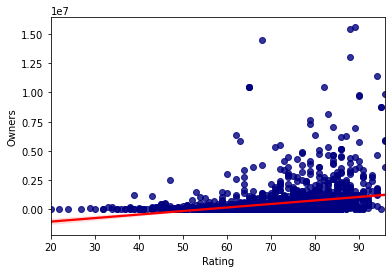

In [8]:
dfrated = df[df.Rating != 0]
ratingvowners = sns.regplot(data=dfrated[dfrated["Owners"]<20000000],x="Rating",y="Owners", scatter_kws={"color": "navy"}, line_kws={"color": "red"})

#### Rating vs Recommendations
This plot compares the Metacritic ratings of games to the amount of positive recommendations it has within steam. This should give us an idea about whether the opinions of critics align with the opinions of Steam owners. The Y axis represents the amount of recommendations a game has, and the X axis represents the Metacritic rating of the game. This plot only includes games with ratings and excludes games with either more than 300,000 recommendations or less than 5000 recommendations. This is to make the plot easier to read as the few games with more than 300,000 zoom the plot out too much, and the large amount of games with very few recommendations creates a gigantic cluster around the bottom end of the data.

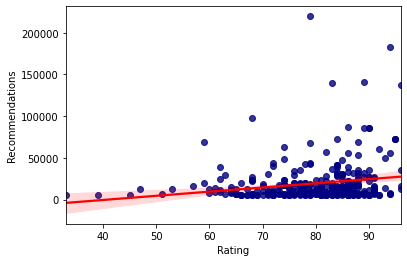

In [9]:
ratingvrecommend = sns.regplot(data=dfrated[(dfrated["Recommendations"]<300000)&(dfrated["Recommendations"]>5000)],x="Rating",y="Recommendations", scatter_kws={"color": "navy"}, line_kws={"color": "red"})

## Research Questions conclusions so far
After looking through and exploring our data, these are the research questions we thought would be interesting to analyse:
1. What game genres are the most popular (they have the most owners)?
    * The most popular genre in terms of owners is by far action, which makes sense as genres overlap and many games are classified as action as well as other genres.
    * Following action the most popular genres are 
2. What game genres make the most money?
    * The game genres with the highest theoretical revenues were Action, Adventure and Indie.
    * It is suprising how little revenue Casual games make compared to how many of them are on the store.
3. Does the amount of games in a genre correlate to the genres popularity?
    * Some genres correlate higher than others, but genres like Indie are overrepresented in total amount of games, this is likely due to the fact that the most popularly owned games are big AAA titles, whereas the highest volume of games comes from smaller and lesser known indie companies.
4. Is there a correlation between owners and rating?
    * Based on the trend line for the scatterplot, there does seem to be a slight correlation indicating that the higher a game's rating is, the more owners it might have. 
5. How do game ratings compare across genres?
    * Out of the most popular genres, it seems like the ones with the lowest average ratings are Casual and Simulation